# Exercises (2.1 - 2.15)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1eP8xyWMWnxX1MD-9v1-_PjuKgJtgPjxt?usp=sharing)

**2.1** <ul />An academic computing center receives a large number of jobs from students and faculty to be executed on the computing facilities. Each student job requires six units of space on disk, and three units of time on a printer. Each faculty job requires eight units of space on disk, and two units of time on a printer. A mixture of jobs is to be selected and run as a batch, and the total disk space and printer time available for a batch are 48 units and 60 units, respectively. The computer center is paid three times as much for running a student job as for running a faculty job. Formulate a linear programming problem to determine the mixture of jobs to be run as a batch that will maximize computer center income. </ul>

**Code Implementation**

In [1]:
from pyomo.environ import *

# Create the ConcreteModel
model = ConcreteModel()

# Define decision variables
model.x1 = Var(domain=NonNegativeReals)  # Number of student jobs
model.x2 = Var(domain=NonNegativeReals)  # Number of faculty jobs

# Define objective function (maximize revenue)
model.obj = Objective(expr=3 * model.x1 + model.x2, sense=maximize)

# Define constraints
model.disk_space = Constraint(expr=6 * model.x1 + 8 * model.x2 <= 48)
model.printer_time = Constraint(expr=3 * model.x1 + 2 * model.x2 <= 60)

# Create a solver and solve the model
solver = SolverFactory('cbc')
results = solver.solve(model, tee=False)

# Output only the key results
print("\nOptimal Solution:")
print(f"Objective value (Maximized Revenue): {model.obj()}")
print(f"Number of student jobs (x₁): {model.x1()}")
print(f"Number of faculty jobs (x₂): {model.x2()}")

# Check if the constraints are satisfied
print("\nConstraints Check:")
print(f"Disk space constraint: 6({model.x1()}) + 8({model.x2()}) = {6*model.x1() + 8*model.x2()} (satisfied)")
print(f"Printer time constraint: 3({model.x1()}) + 2({model.x2()}) = {3*model.x1() + 2*model.x2()} (satisfied)")



Optimal Solution:
Objective value (Maximized Revenue): 24.0
Number of student jobs (x₁): 8.0
Number of faculty jobs (x₂): 0.0

Constraints Check:
Disk space constraint: 6(8.0) + 8(0.0) = 48.0 (satisfied)
Printer time constraint: 3(8.0) + 2(0.0) = 24.0 (satisfied)


**2.2** <ul /> A tree farm cultivates Virginia pine trees for sale as Christmas trees. Pine trees, being what they are, require extensive pruning during the growing season to shape the trees appropriately for the Christmas tree market. For this purpose, the farm manager can purchase pruning hooks for \$16.60 each. He also has a ready supply of spears (at \$3 each) that can be bent into pruning hooks. This conversion process requires one hour of labor, whereas final assembly of a purchased pruning hook takes only 15 minutes of labor. Only 10 hours of labor are available to the manager. With labor rates at \$8.40 per hour, the farm manager intends to spend no more than \$280 on buying or making pruning hooks this year. In all, how many pruning hooks can he acquire (from outright purchase and through conversion), given these limitations? Formulate this as a linear programming problem. </ul>


**Code Implementation**

In [2]:
from pyomo.environ import *

# Create the ConcreteModel
model = ConcreteModel()

# Define decision variables
model.x1 = Var(domain=NonNegativeReals)  # Number of pruning hooks purchased
model.x2 = Var(domain=NonNegativeReals)  # Number of pruning hooks made

# Define objective function (maximize the number of hooks)
model.obj = Objective(expr=model.x1 + model.x2, sense=maximize)

# Define constraints
model.budget = Constraint(expr=16.60 * model.x1 + 3 * model.x2 + 8.40 * (model.x2 + 0.25 * model.x1) <= 280)
model.labor = Constraint(expr=model.x2 <= 10)

# Create a solver and solve the model
solver = SolverFactory('cbc')
results = solver.solve(model, tee=False)  # Suppress solver output

# Output only the key results
print("\nOptimal Solution:")
print(f"Objective value (Maximized Hooks): {model.obj()}")
print(f"Number of pruning hooks purchased (x₁): {model.x1()}")
print(f"Number of pruning hooks made (x₂): {model.x2()}")

# Check if the constraints are satisfied
print("\nConstraints Check:")
print(f"Budget constraint: 16.60({model.x1()}) + 3({model.x2()}) + 8.40({model.x2() + 0.25 * model.x1()}) = {16.60*model.x1() + 3*model.x2() + 8.40*(model.x2() + 0.25*model.x1())} (satisfied)")
print(f"Labor constraint: {model.x2()} <= 10 (satisfied)")



Optimal Solution:
Objective value (Maximized Hooks): 18.8770053
Number of pruning hooks purchased (x₁): 8.8770053
Number of pruning hooks made (x₂): 10.0

Constraints Check:
Budget constraint: 16.60(8.8770053) + 3(10.0) + 8.40(12.219251325) = 279.99999911000003 (satisfied)
Labor constraint: 10.0 <= 10 (satisfied)


**2.3** <ul /> A plant has five machines, each of which can manufacture the same two models of a certain product. The maximum number of hours available on the five machines during the next production period are, respectively, 60, 85, 65, 90, and 70. The demand for products created during this next production period is expected to be 850 units of model 1 and 960 units of model 2. The profits (in dollars per hour) and production rates (per hour) are given in tabular form:

|             | Profit      |      |             | Production Rate |      |
| :---------- | :---------- | :--- | :---------- | :-------------- | :--- |
| **Machine** | **Model 1** | **2** | **Machine** | **Model 1** | **2** |
| 1           | 2           | 5    | 1           | 7               | 9    |
| 2           | 8           | 3    | 2           | 5               | 4    |
| 3           | 3           | 6    | 3           | 6               | 3    |
| 4           | 5           | 3    | 4           | 4               | 8    |
| 5           | 4           | 7    | 5           | 5               | 6    |


Let $x_{ij}$ be the number of hours machine i is scheduled to manufacture model $j$, for $i$ = 1, …, 5 and $j$ = 1, 2. Formulate a linear programming model to maximize profits. </ul>

**Code Implementation**

In [3]:
from pyomo.environ import *

# Create the ConcreteModel
model = ConcreteModel()

# Define decision variables: x_ij for hours machine i is used for model j
model.x11 = Var(domain=NonNegativeReals)  # Machine 1 for Model 1
model.x12 = Var(domain=NonNegativeReals)  # Machine 1 for Model 2
model.x21 = Var(domain=NonNegativeReals)  # Machine 2 for Model 1
model.x22 = Var(domain=NonNegativeReals)  # Machine 2 for Model 2
model.x31 = Var(domain=NonNegativeReals)  # Machine 3 for Model 1
model.x32 = Var(domain=NonNegativeReals)  # Machine 3 for Model 2
model.x41 = Var(domain=NonNegativeReals)  # Machine 4 for Model 1
model.x42 = Var(domain=NonNegativeReals)  # Machine 4 for Model 2
model.x51 = Var(domain=NonNegativeReals)  # Machine 5 for Model 1
model.x52 = Var(domain=NonNegativeReals)  # Machine 5 for Model 2

# Define the objective function (maximize profit)
model.obj = Objective(
    expr=2*model.x11 + 5*model.x12 + 8*model.x21 + 3*model.x22 +
         3*model.x31 + 6*model.x32 + 5*model.x41 + 3*model.x42 +
         4*model.x51 + 7*model.x52,
    sense=maximize
)

# Define the machine time constraints
model.machine1 = Constraint(expr=model.x11 + model.x12 <= 60)
model.machine2 = Constraint(expr=model.x21 + model.x22 <= 85)
model.machine3 = Constraint(expr=model.x31 + model.x32 <= 65)
model.machine4 = Constraint(expr=model.x41 + model.x42 <= 90)
model.machine5 = Constraint(expr=model.x51 + model.x52 <= 70)

# Define the demand constraints
model.demand1 = Constraint(expr=7*model.x11 + 5*model.x21 + 6*model.x31 + 4*model.x41 + 5*model.x51 >= 850)
model.demand2 = Constraint(expr=9*model.x12 + 4*model.x22 + 3*model.x32 + 8*model.x42 + 6*model.x52 >= 960)

# Create a solver and solve the model
solver = SolverFactory('cbc')
results = solver.solve(model, tee=False)

# Display the results in a clear format
print("\nOptimal Solution:")
print(f"Objective value (Maximized Profit): {model.obj():.2f}")
print(f"Hours used by machine 1 for model 1 (x11): {model.x11():.2f}")
print(f"Hours used by machine 1 for model 2 (x12): {model.x12():.2f}")
print(f"Hours used by machine 2 for model 1 (x21): {model.x21():.2f}")
print(f"Hours used by machine 2 for model 2 (x22): {model.x22():.2f}")
print(f"Hours used by machine 3 for model 1 (x31): {model.x31():.2f}")
print(f"Hours used by machine 3 for model 2 (x32): {model.x32():.2f}")
print(f"Hours used by machine 4 for model 1 (x41): {model.x41():.2f}")
print(f"Hours used by machine 4 for model 2 (x42): {model.x42():.2f}")
print(f"Hours used by machine 5 for model 1 (x51): {model.x51():.2f}")
print(f"Hours used by machine 5 for model 2 (x52): {model.x52():.2f}")

# Check if the constraints are satisfied (Optional)
print("\nConstraints Check:")
print(f"Machine 1 time: {model.x11() + model.x12():.2f} / 60 (satisfied)")
print(f"Machine 2 time: {model.x21() + model.x22():.2f} / 85 (satisfied)")
print(f"Machine 3 time: {model.x31() + model.x32():.2f} / 65 (satisfied)")
print(f"Machine 4 time: {model.x41() + model.x42():.2f} / 90 (satisfied)")
print(f"Machine 5 time: {model.x51() + model.x52():.2f} / 70 (satisfied)")
print(f"Demand for Model 1: {7*model.x11() + 5*model.x21() + 6*model.x31() + 4*model.x41() + 5*model.x51():.2f} / 850 (satisfied)")
print(f"Demand for Model 2: {9*model.x12() + 4*model.x22() + 3*model.x32() + 8*model.x42() + 6*model.x52():.2f} / 960 (satisfied)")



Optimal Solution:
Objective value (Maximized Profit): 2282.14
Hours used by machine 1 for model 1 (x11): 9.29
Hours used by machine 1 for model 2 (x12): 50.71
Hours used by machine 2 for model 1 (x21): 85.00
Hours used by machine 2 for model 2 (x22): 0.00
Hours used by machine 3 for model 1 (x31): 0.00
Hours used by machine 3 for model 2 (x32): 65.00
Hours used by machine 4 for model 1 (x41): 90.00
Hours used by machine 4 for model 2 (x42): 0.00
Hours used by machine 5 for model 1 (x51): 0.00
Hours used by machine 5 for model 2 (x52): 70.00

Constraints Check:
Machine 1 time: 60.00 / 60 (satisfied)
Machine 2 time: 85.00 / 85 (satisfied)
Machine 3 time: 65.00 / 65 (satisfied)
Machine 4 time: 90.00 / 90 (satisfied)
Machine 5 time: 70.00 / 70 (satisfied)
Demand for Model 1: 850.00 / 850 (satisfied)
Demand for Model 2: 1071.43 / 960 (satisfied)


**2.4** 
<ul/>

Metallic alloys A, B, and C are to be made to customer specifications from four different metals (W, X, Y, and Z) that are extracted from two different ores. The cost, maximum available quantity, and constituent parts of these ores are:


| Alloy | Specifications                          | Selling Price ($/ton) |
|-------|----------------------------------------|----------------------|
| A     | At least 30% of X                     | 600                  |
|       | At least 50% of W                     |                      |
|       | At most 10% of Y                      |                      |
| B     | Between 30% and 40% of Z              | 500                  |
|       | At least 40% of X                     |                      |
|       | At most 70% of W                      |                      |
| C     | At least 40% of Y                     | 450                  |
|       | At most 60% of W                      |                      |



Customer specifications and selling price for the three alloys are: 

| Ore  | Cost ($/ton) | Maximum Tons Available | W (%) | X (%) | Y (%) | Z (%) |
|------|-------------|-----------------------|------|------|------|------|
| I    | 150         | 2800                  | 40   | 10   | 15   | 25   |
| II   | 95          | 3100                  | 30   | 20   | 10   | 20   |

Formulate a linear programming model that meets the specified constraints and maximizes the profits from the sale of the alloys. (Hint: Let $x_{ijk}$ be the amount of the $i$-th metal extracted from the $j$-th ore and used in the $k$-th alloy.)

</ul>

**Code Implementation**

In [4]:
from pyomo.environ import *

# Create the ConcreteModel
model = ConcreteModel()

# Define decision variables: x_ijk for the amount of metal i extracted from ore j used in alloy k
model.xWX_A = Var(domain=NonNegativeReals)
model.xXX_A = Var(domain=NonNegativeReals)
model.xYX_A = Var(domain=NonNegativeReals)
model.xZX_A = Var(domain=NonNegativeReals)

model.xWX_B = Var(domain=NonNegativeReals)
model.xXX_B = Var(domain=NonNegativeReals)
model.xYX_B = Var(domain=NonNegativeReals)
model.xZX_B = Var(domain=NonNegativeReals)

model.xWX_C = Var(domain=NonNegativeReals)
model.xXX_C = Var(domain=NonNegativeReals)
model.xYX_C = Var(domain=NonNegativeReals)
model.xZX_C = Var(domain=NonNegativeReals)

# Define the objective function (maximize profit)
model.obj = Objective(
    expr=600 * (model.xWX_A + model.xXX_A + model.xYX_A + model.xZX_A) +
         500 * (model.xWX_B + model.xXX_B + model.xYX_B + model.xZX_B) +
         450 * (model.xWX_C + model.xXX_C + model.xYX_C + model.xZX_C),
    sense=maximize
)

# Define ore constraints (availability)
model.ore1_W = Constraint(expr=model.xWX_A + model.xWX_B + model.xWX_C <= 2800)
model.ore1_X = Constraint(expr=model.xXX_A + model.xXX_B + model.xXX_C <= 2800)
model.ore1_Y = Constraint(expr=model.xYX_A + model.xYX_B + model.xYX_C <= 2800)
model.ore1_Z = Constraint(expr=model.xZX_A + model.xZX_B + model.xZX_C <= 2800)

model.ore2_W = Constraint(expr=model.xWX_A + model.xWX_B + model.xWX_C <= 3100)
model.ore2_X = Constraint(expr=model.xXX_A + model.xXX_B + model.xXX_C <= 3100)
model.ore2_Y = Constraint(expr=model.xYX_A + model.xYX_B + model.xYX_C <= 3100)
model.ore2_Z = Constraint(expr=model.xZX_A + model.xZX_B + model.xZX_C <= 3100)

# Define alloy specifications (customer constraints)
# Alloy A specifications
model.alloyA_X = Constraint(expr=model.xXX_A >= 0.30 * (model.xWX_A + model.xXX_A + model.xYX_A + model.xZX_A))
model.alloyA_W = Constraint(expr=model.xWX_A >= 0.50 * (model.xWX_A + model.xXX_A + model.xYX_A + model.xZX_A))
model.alloyA_Y = Constraint(expr=model.xYX_A <= 0.10 * (model.xWX_A + model.xXX_A + model.xYX_A + model.xZX_A))

# Alloy B specifications
model.alloyB_Z_lower = Constraint(expr=0.30 * (model.xWX_B + model.xXX_B + model.xYX_B + model.xZX_B) <= model.xZX_B)
model.alloyB_Z_upper = Constraint(expr=model.xZX_B <= 0.40 * (model.xWX_B + model.xXX_B + model.xYX_B + model.xZX_B))
model.alloyB_X = Constraint(expr=model.xXX_B >= 0.40 * (model.xWX_B + model.xXX_B + model.xYX_B + model.xZX_B))
model.alloyB_W = Constraint(expr=model.xWX_B <= 0.70 * (model.xWX_B + model.xXX_B + model.xYX_B + model.xZX_B))

# Alloy C specifications
model.alloyC_Y = Constraint(expr=model.xYX_C >= 0.40 * (model.xWX_C + model.xXX_C + model.xYX_C + model.xZX_C))
model.alloyC_W = Constraint(expr=model.xWX_C <= 0.60 * (model.xWX_C + model.xXX_C + model.xYX_C + model.xZX_C))

# Solve the model
solver = SolverFactory('cbc')
results = solver.solve(model, tee=False)

# Display the results in a clear format
print("\nOptimal Solution:")
print(f"Objective value (Maximized Profit): {model.obj():.2f}")
print(f"Amount of metal W used in alloy A (xWX_A): {model.xWX_A():.2f}")
print(f"Amount of metal X used in alloy A (xXX_A): {model.xXX_A():.2f}")
print(f"Amount of metal Y used in alloy A (xYX_A): {model.xYX_A():.2f}")
print(f"Amount of metal Z used in alloy A (xZX_A): {model.xZX_A():.2f}")
print(f"Amount of metal W used in alloy B (xWX_B): {model.xWX_B():.2f}")
print(f"Amount of metal X used in alloy B (xXX_B): {model.xXX_B():.2f}")
print(f"Amount of metal Y used in alloy B (xYX_B): {model.xYX_B():.2f}")
print(f"Amount of metal Z used in alloy B (xZX_B): {model.xZX_B():.2f}")
print(f"Amount of metal W used in alloy C (xWX_C): {model.xWX_C():.2f}")
print(f"Amount of metal X used in alloy C (xXX_C): {model.xXX_C():.2f}")
print(f"Amount of metal Y used in alloy C (xYX_C): {model.xYX_C():.2f}")
print(f"Amount of metal Z used in alloy C (xZX_C): {model.xZX_C():.2f}")



Optimal Solution:
Objective value (Maximized Profit): 6020000.00
Amount of metal W used in alloy A (xWX_A): 2800.00
Amount of metal X used in alloy A (xXX_A): 1680.00
Amount of metal Y used in alloy A (xYX_A): 0.00
Amount of metal Z used in alloy A (xZX_A): 1120.00
Amount of metal W used in alloy B (xWX_B): 0.00
Amount of metal X used in alloy B (xXX_B): 1120.00
Amount of metal Y used in alloy B (xYX_B): 560.00
Amount of metal Z used in alloy B (xZX_B): 1120.00
Amount of metal W used in alloy C (xWX_C): 0.00
Amount of metal X used in alloy C (xXX_C): 0.00
Amount of metal Y used in alloy C (xYX_C): 2240.00
Amount of metal Z used in alloy C (xZX_C): 560.00


**2.5**

<ul />

Show graphically the feasible region corresponding to the following set of constraints:

$$2x_1 + x_2 \geq -4$$

$$x_1 + x_2 \leq 8$$

$$-x_1 + x_2 \leq 6$$

$$x_1, x_2 \geq 0$$


Give the coordinates of each of the extreme points of the feasible region.

</ul>

**Code Implementation**

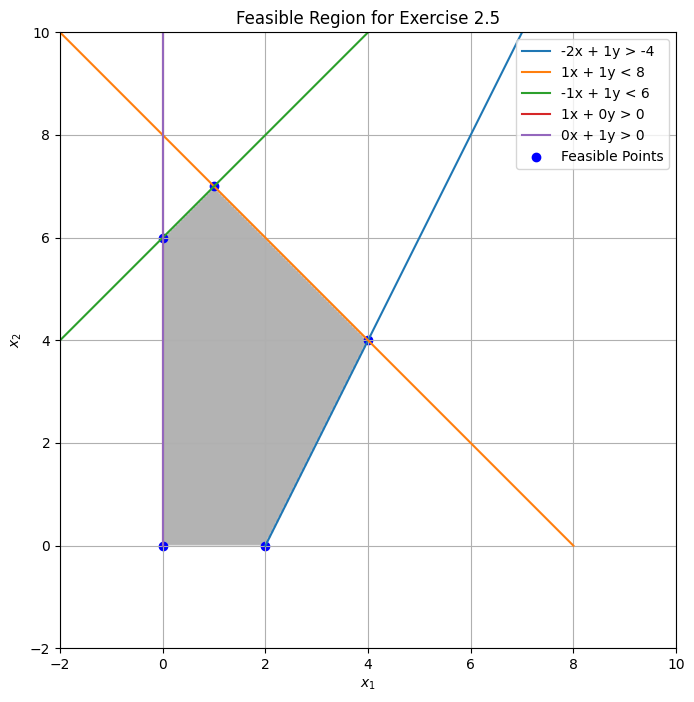

Extreme Points of Feasible Region:
(4.00, 4.00)
(2.00, 0.00)
(1.00, 7.00)
(-0.00, 6.00)
(0.00, 0.00)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def find_intersection(line1, line2):
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])
    b = np.array([line1[2], line2[2]])
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)

def is_feasible(point, constraints):
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):
            return False
        if sign == '>' and not (a * x + b * y >= c):
            return False
    return True

def find_feasible_points(constraints):
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):
        intersection = find_intersection(line1, line2)
        if intersection is not None and is_feasible(intersection, constraints):
            feasible_points.append(intersection)
    return np.array(feasible_points)

def plot_feasible_region(constraints, x_range, y_range):
    x, y = np.meshgrid(x_range, y_range)
    feasible_region = np.ones_like(x, dtype=bool)

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible_region &= (a * x + b * y <= c)
        elif sign == '>':
            feasible_region &= (a * x + b * y >= c)

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()),
               origin="lower", cmap="Greys", alpha=0.3)

def plot_constraints(constraints, x_range):
    for a, b, c, sign in constraints:
        y_vals = np.linspace(0, 10, 200)
        if a != 0:
            x_vals = (c - b * y_vals) / a
        else:
            x_vals = np.full_like(y_vals, c / b)
        plt.plot(x_vals, y_vals, label=f'{a}x + {b}y {sign} {c}')

def solve_and_plot():
    constraints = [
        (-2, 1, -4, '>'),  # -2x1 + x2 >= -4
        (1, 1, 8, '<'),    # x1 + x2 <= 8
        (-1, 1, 6, '<'),   # -x1 + x2 <= 6
        (1, 0, 0, '>'),    # x1 >= 0
        (0, 1, 0, '>')     # x2 >= 0
    ]

    x_range = np.linspace(-5, 10, 300)
    y_range = np.linspace(-5, 10, 300)
    plt.figure(figsize=(8, 8))

    plot_feasible_region(constraints, x_range, y_range)
    plot_constraints(constraints, x_range)

    feasible_points = find_feasible_points(constraints)

    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')

    plt.xlim(-2, 10)
    plt.ylim(-2, 10)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper right')
    plt.title("Feasible Region for Exercise 2.5")
    plt.grid(True)
    plt.show()

    # Print extreme points
    print("Extreme Points of Feasible Region:")
    for point in feasible_points:
        print(f"({point[0]:.2f}, {point[1]:.2f})")

solve_and_plot()


**2.6**

<ul />

What is the feasible region corresponding to the following set of constraints?


$$x_1 + 3x_2 \leq 24$$

$$x_1 \leq 6$$

$$-x_1 + 2x_2 \leq 10$$

$$x_1, x_2 \geq 0$$


Evaluate the objective function $z = 2x_1 + 5x_2$ at each of the extreme points of this feasible region.

</ul>

**Code Implementation**

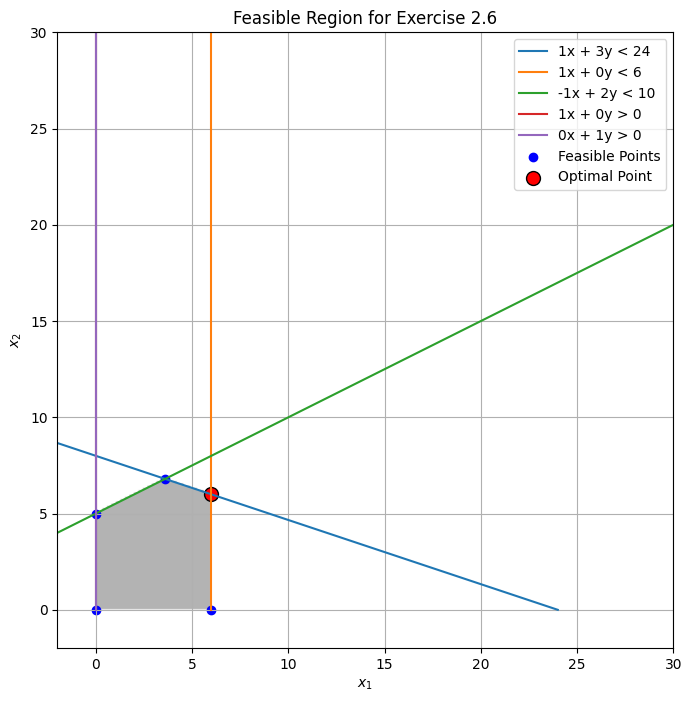


Extreme Points and Objective Function Values:
Point (6.00, 6.00) → z = 42.00
Point (3.60, 6.80) → z = 41.20
Point (6.00, 0.00) → z = 12.00
Point (-0.00, 5.00) → z = 25.00
Point (0.00, 0.00) → z = 0.00


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def find_intersection(line1, line2):
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])
    b = np.array([line1[2], line2[2]])
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)

def is_feasible(point, constraints):
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):
            return False
        if sign == '>' and not (a * x + b * y >= c):
            return False
    return True

def find_feasible_points(constraints):
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):
        intersection = find_intersection(line1, line2)
        if intersection is not None and is_feasible(intersection, constraints):
            feasible_points.append(intersection)
    return np.array(feasible_points)

def plot_feasible_region(constraints, x_range, y_range):
    x, y = np.meshgrid(x_range, y_range)
    feasible_region = np.ones_like(x, dtype=bool)

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible_region &= (a * x + b * y <= c)
        elif sign == '>':
            feasible_region &= (a * x + b * y >= c)

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()),
               origin="lower", cmap="Greys", alpha=0.3)

def plot_constraints(constraints, x_range):
    for a, b, c, sign in constraints:
        y_vals = np.linspace(0, 30, 200)
        if a != 0:
            x_vals = (c - b * y_vals) / a
        else:
            x_vals = np.full_like(y_vals, c / b)
        plt.plot(x_vals, y_vals, label=f'{a}x + {b}y {sign} {c}')

def solve_and_plot():
    constraints = [
        (1, 3, 24, '<'),   # x1 + 3x2 <= 24
        (1, 0, 6, '<'),    # x1 <= 6
        (-1, 2, 10, '<'),  # -x1 + 2x2 <= 10
        (1, 0, 0, '>'),    # x1 >= 0
        (0, 1, 0, '>')     # x2 >= 0
    ]

    obj_func = lambda x1, x2: 2*x1 + 5*x2  # z = 2x1 + 5x2

    x_range = np.linspace(-5, 30, 300)
    y_range = np.linspace(-5, 30, 300)
    plt.figure(figsize=(8, 8))

    plot_feasible_region(constraints, x_range, y_range)
    plot_constraints(constraints, x_range)

    feasible_points = find_feasible_points(constraints)

    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')

        # Compute objective function values at extreme points
        obj_values = [obj_func(x1, x2) for x1, x2 in feasible_points]

        # Display best extreme point
        best_idx = np.argmax(obj_values)
        optimal_point = feasible_points[best_idx]
        plt.scatter(*optimal_point, color='red', s=100, label='Optimal Point', edgecolors='black')

    plt.xlim(-2, 30)
    plt.ylim(-2, 30)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper right')
    plt.title("Feasible Region for Exercise 2.6")
    plt.grid(True)
    plt.show()

    # Print extreme points and their objective values
    print("\nExtreme Points and Objective Function Values:")
    for point in feasible_points:
        z_value = obj_func(point[0], point[1])
        print(f"Point ({point[0]:.2f}, {point[1]:.2f}) → z = {z_value:.2f}")

solve_and_plot()


**2.7**
<ul />

Solve the following linear programming problem graphically.

$$
\begin{align*}
\text{maximize} \quad & z = x_1 - x_2 \\
\text{subject to} \quad & x_1 + x_2 \geq 1 \\  
& 3x_2 \leq 9 \\
& 2x_1 + x_2 \leq 4 \\
& x_1 \leq 3/2 \\
&  x_1, x_2 \geq 0
\end{align*}
$$

Give the optimal value of $z$ and the optimal solution ($x_1$, $x_2$).

</ul>

**Code Implementation**

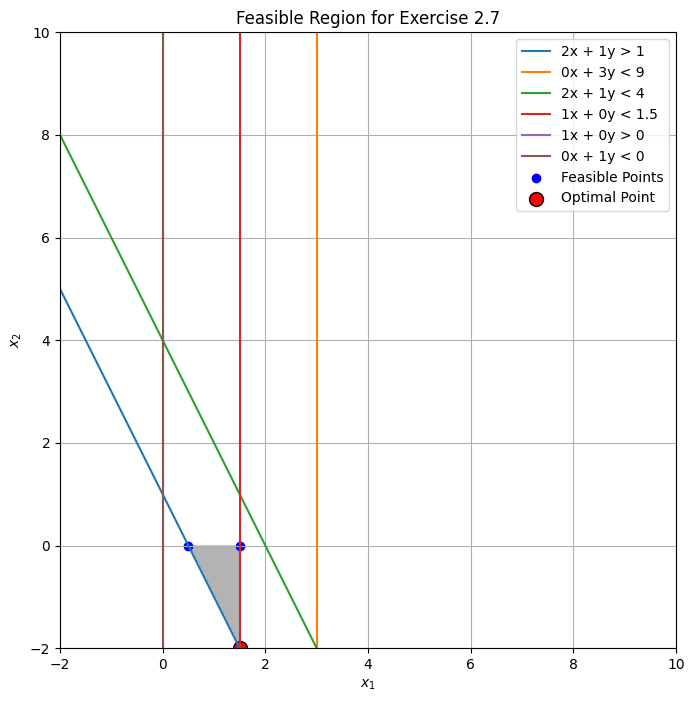


Extreme Points and Objective Function Values:
Point (1.50, -2.00) → z = 3.50
Point (0.50, 0.00) → z = 0.50
Point (1.50, 0.00) → z = 1.50


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def find_intersection(line1, line2):
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])
    b = np.array([line1[2], line2[2]])
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)

def is_feasible(point, constraints):
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):
            return False
        if sign == '>' and not (a * x + b * y >= c):
            return False
    return True

def find_feasible_points(constraints):
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):
        intersection = find_intersection(line1, line2)
        if intersection is not None and is_feasible(intersection, constraints):
            feasible_points.append(intersection)
    return np.array(feasible_points)

def plot_feasible_region(constraints, x_range, y_range):
    x, y = np.meshgrid(x_range, y_range)
    feasible_region = np.ones_like(x, dtype=bool)

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible_region &= (a * x + b * y <= c)
        elif sign == '>':
            feasible_region &= (a * x + b * y >= c)

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()),
               origin="lower", cmap="Greys", alpha=0.3)

def plot_constraints(constraints, x_range):
    for a, b, c, sign in constraints:
        y_vals = np.linspace(-5, 10, 200)
        if a != 0:
            x_vals = (c - b * y_vals) / a
        else:
            x_vals = np.full_like(y_vals, c / b)
        plt.plot(x_vals, y_vals, label=f'{a}x + {b}y {sign} {c}')

def solve_and_plot():
    constraints = [
        (2, 1, 1, '>'),   # x1 + x2 >= 1
        (0, 3, 9, '<'),    # 3x2 <= 9
        (2, 1, 4, '<'),    # 2x1 + x2 <= 4
        (1, 0, 3/2, '<'),    # x1 <= 3/2
        (1, 0, 0, '>'),    # x1 >= 0
        (0, 1, 0, '<')     # x2 >= 0
    ]

    obj_func = lambda x1, x2: x1 - x2  # z = x1 - x2

    x_range = np.linspace(-5, 10, 300)
    y_range = np.linspace(-5, 10, 300)
    plt.figure(figsize=(8, 8))

    plot_feasible_region(constraints, x_range, y_range)
    plot_constraints(constraints, x_range)

    feasible_points = find_feasible_points(constraints)

    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')

        # Compute objective function values at extreme points
        obj_values = [obj_func(x1, x2) for x1, x2 in feasible_points]

        # Display best extreme point
        best_idx = np.argmax(obj_values)
        optimal_point = feasible_points[best_idx]
        plt.scatter(*optimal_point, color='red', s=100, label='Optimal Point', edgecolors='black')

    plt.xlim(-2, 10)
    plt.ylim(-2, 10)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper right')
    plt.title("Feasible Region for Exercise 2.7")
    plt.grid(True)
    plt.show()

    # Print extreme points and their objective values
    print("\nExtreme Points and Objective Function Values:")
    for point in feasible_points:
        z_value = obj_func(point[0], point[1])
        print(f"Point ({point[0]:.2f}, {point[1]:.2f}) → z = {z_value:.2f}")

solve_and_plot()


**2.8**

<ul />

Solve the following linear programming problem graphically:

$$
\begin{align*}
\text{maximize} \quad & z = -2x_1 + x_2 \\
\text{subject to} \quad & x_1 - x_2 \leq 5 \\  
& x_1 \leq 7 \\
& x_2 \leq 6 \\
& x_1 - x_2 \geq -4 \\
&  x_1, x_2 \geq 0
\end{align*}
$$


Outline the feasible region, and give the optimal values of $z$, $x_1$, and $x_2$.

</ul>

**Code Implementation**

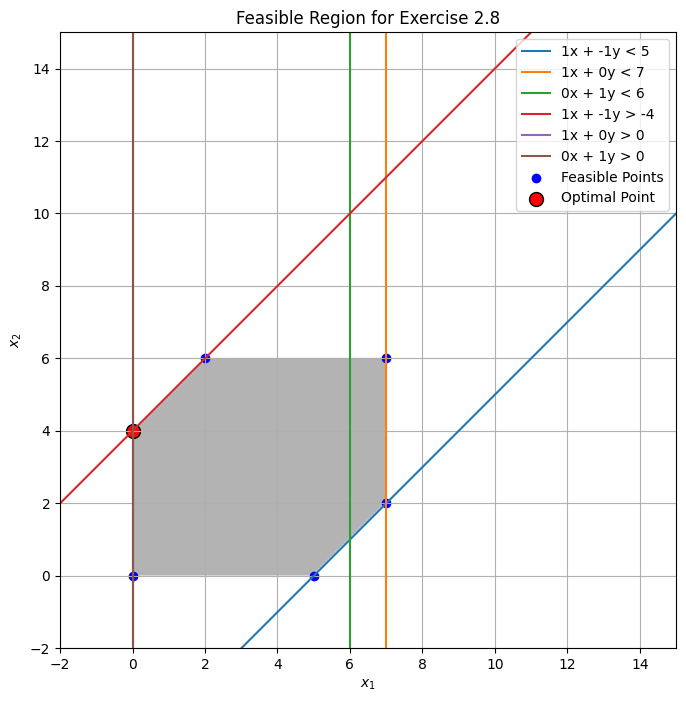


Extreme Points and Objective Function Values:
Point (7.00, 2.00) → z = -12.00
Point (5.00, 0.00) → z = -10.00
Point (7.00, 6.00) → z = -8.00
Point (2.00, 6.00) → z = 2.00
Point (0.00, 4.00) → z = 4.00
Point (0.00, 0.00) → z = 0.00


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def find_intersection(line1, line2):
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])
    b = np.array([line1[2], line2[2]])
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)

def is_feasible(point, constraints):
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):
            return False
        if sign == '>' and not (a * x + b * y >= c):
            return False
    return True

def find_feasible_points(constraints):
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):
        intersection = find_intersection(line1, line2)
        if intersection is not None and is_feasible(intersection, constraints):
            feasible_points.append(intersection)
    return np.array(feasible_points)

def plot_feasible_region(constraints, x_range, y_range):
    x, y = np.meshgrid(x_range, y_range)
    feasible_region = np.ones_like(x, dtype=bool)

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible_region &= (a * x + b * y <= c)
        elif sign == '>':
            feasible_region &= (a * x + b * y >= c)

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()),
               origin="lower", cmap="Greys", alpha=0.3)

def plot_constraints(constraints, x_range):
    for a, b, c, sign in constraints:
        y_vals = np.linspace(-5, 15, 200)
        if a != 0:
            x_vals = (c - b * y_vals) / a
        else:
            x_vals = np.full_like(y_vals, c / b)
        plt.plot(x_vals, y_vals, label=f'{a}x + {b}y {sign} {c}')

def solve_and_plot():
    constraints = [
        (1, -1, 5, '<'),   # x1 - x2 <= 5
        (1, 0, 7, '<'),    # x1  <= 7
        (0, 1, 6, '<'),    # x2 <= 6
        (1, -1, -4, '>'),  # x1 - x2 >= -4
        (1, 0, 0, '>'),    # x1 >= 0
        (0, 1, 0, '>')     # x2 >= 0
    ]

    obj_func = lambda x1, x2: -2*x1 + x2  # z = -2x1 + x2

    x_range = np.linspace(-5, 15, 300)
    y_range = np.linspace(-5, 15, 300)
    plt.figure(figsize=(8, 8))

    plot_feasible_region(constraints, x_range, y_range)
    plot_constraints(constraints, x_range)

    feasible_points = find_feasible_points(constraints)

    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')

        # Compute objective function values at extreme points
        obj_values = [obj_func(x1, x2) for x1, x2 in feasible_points]

        # Display best extreme point
        best_idx = np.argmax(obj_values)
        optimal_point = feasible_points[best_idx]
        plt.scatter(*optimal_point, color='red', s=100, label='Optimal Point', edgecolors='black')

    plt.xlim(-2, 15)
    plt.ylim(-2, 15)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper right')
    plt.title("Feasible Region for Exercise 2.8")
    plt.grid(True)
    plt.show()

    # Print extreme points and their objective values
    print("\nExtreme Points and Objective Function Values:")
    for point in feasible_points:
        z_value = obj_func(point[0], point[1])
        print(f"Point ({point[0]:.2f}, {point[1]:.2f}) → z = {z_value:.2f}")

solve_and_plot()


**2.9**

<ul />

Examine the following formulation, and comment on the nature of its solution:

$$
\begin{align*}
\text{maximize} \quad & z = 3x_1 - 2x_2 \\
\text{subject to} \quad & x_1 \leq 2 \\  
& x_2 \leq 3 \\
& 3x_1 - 2x_2 \geq 8 \\
&  x_1, x_2 \geq 0
\end{align*}
$$

</ul>

**Code Implementation**

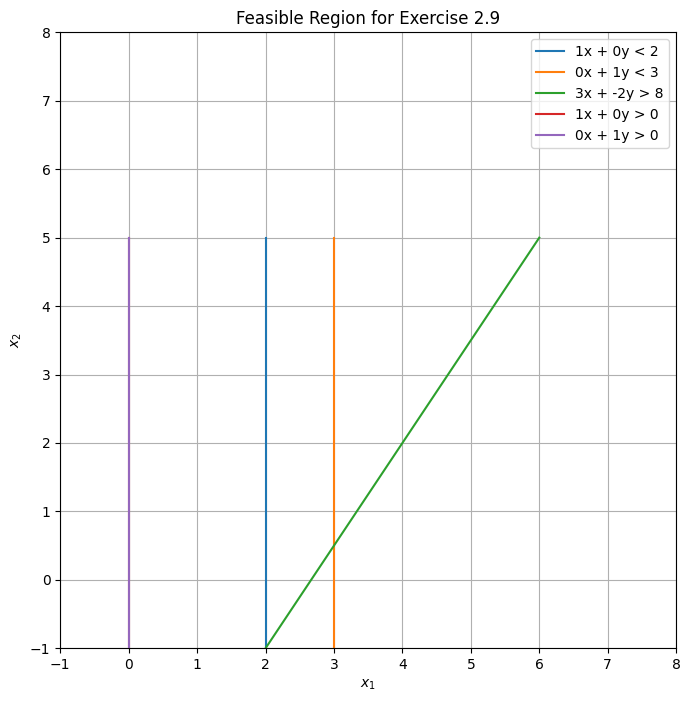


No feasible solution exists.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def find_intersection(line1, line2):
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])
    b = np.array([line1[2], line2[2]])
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)

def is_feasible(point, constraints):
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):
            return False
        if sign == '>' and not (a * x + b * y >= c):
            return False
    return True

def find_feasible_points(constraints):
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):
        intersection = find_intersection(line1, line2)
        if intersection is not None and is_feasible(intersection, constraints):
            feasible_points.append(intersection)
    return np.array(feasible_points)

def plot_feasible_region(constraints, x_range, y_range):
    x, y = np.meshgrid(x_range, y_range)
    feasible_region = np.ones_like(x, dtype=bool)

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible_region &= (a * x + b * y <= c)
        elif sign == '>':
            feasible_region &= (a * x + b * y >= c)

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()),
               origin="lower", cmap="Greys", alpha=0.3)

def plot_constraints(constraints, x_range):
    for a, b, c, sign in constraints:
        y_vals = np.linspace(-5, 5, 200)
        if a != 0:
            x_vals = (c - b * y_vals) / a
        else:
            x_vals = np.full_like(y_vals, c / b)
        plt.plot(x_vals, y_vals, label=f'{a}x + {b}y {sign} {c}')

def solve_and_plot():
    constraints = [
        (1, 0, 2, '<'),    # x1 ≤ 2
        (0, 1, 3, '<'),    # x2 ≤ 3
        (3, -2, 8, '>'),   # 3x1 - 2x2 ≥ 8
        (1, 0, 0, '>'),    # x1 ≥ 0
        (0, 1, 0, '>')     # x2 ≥ 0
    ]

    obj_func = lambda x1, x2: 3*x1 - 2*x2  # z = 3x1 - 2x2

    x_range = np.linspace(-1, 8, 300)
    y_range = np.linspace(-1, 8, 300)
    plt.figure(figsize=(8, 8))

    plot_feasible_region(constraints, x_range, y_range)
    plot_constraints(constraints, x_range)

    feasible_points = find_feasible_points(constraints)

    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')

        # Compute objective function values at extreme points
        obj_values = [obj_func(x1, x2) for x1, x2 in feasible_points]

        # Display best extreme point
        best_idx = np.argmax(obj_values)
        optimal_point = feasible_points[best_idx]
        plt.scatter(*optimal_point, color='red', s=100, label='Optimal Point', edgecolors='black')

    plt.xlim(-1, 8)
    plt.ylim(-1, 8)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper right')
    plt.title("Feasible Region for Exercise 2.9")
    plt.grid(True)
    plt.show()

    # Print extreme points and their objective values
    if feasible_points.size > 0:
        print("\nExtreme Points and Objective Function Values:")
        for point in feasible_points:
            z_value = obj_func(point[0], point[1])
            print(f"Point ({point[0]:.2f}, {point[1]:.2f}) → z = {z_value:.2f}")
    else:
        print("\nNo feasible solution exists.")

solve_and_plot()


**2.10**

<ul />

Examine the next formulation, and comment on the nature of its solution:

$$
\begin{align*}
\text{maximize} \quad & z = 3x_1 + 4x_2 \\
\text{subject to} \quad & z = 3x_1 + 4x_2 \\  
& x_1 + x_2 \geq 1 \\
&  x_1, x_2 \geq 0
\end{align*}
$$

</ul>

**Code Implementation**

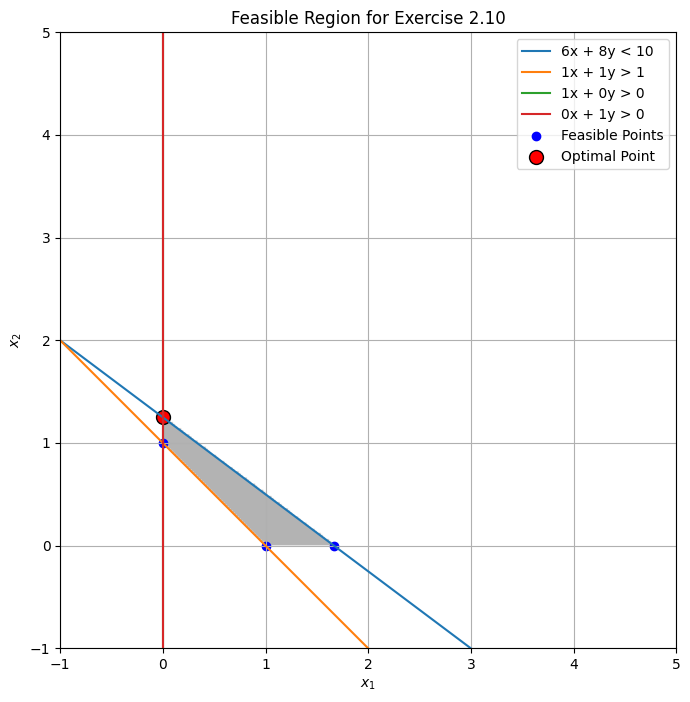


Extreme Points and Objective Function Values:
Point (0.00, 1.25) → z = 5.00
Point (1.67, 0.00) → z = 5.00
Point (0.00, 1.00) → z = 4.00
Point (1.00, 0.00) → z = 3.00


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def find_intersection(line1, line2):
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])
    b = np.array([line1[2], line2[2]])
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)

def is_feasible(point, constraints):
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):
            return False
        if sign == '>' and not (a * x + b * y >= c):
            return False
    return True

def find_feasible_points(constraints):
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):
        intersection = find_intersection(line1, line2)
        if intersection is not None and is_feasible(intersection, constraints):
            feasible_points.append(intersection)
    return np.array(feasible_points)

def plot_feasible_region(constraints, x_range, y_range):
    x, y = np.meshgrid(x_range, y_range)
    feasible_region = np.ones_like(x, dtype=bool)

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible_region &= (a * x + b * y <= c)
        elif sign == '>':
            feasible_region &= (a * x + b * y >= c)

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()),
               origin="lower", cmap="Greys", alpha=0.3)

def plot_constraints(constraints, x_range):
    for a, b, c, sign in constraints:
        y_vals = np.linspace(-5, 10, 200)
        if a != 0:
            x_vals = (c - b * y_vals) / a
        else:
            x_vals = np.full_like(y_vals, c / b)
        plt.plot(x_vals, y_vals, label=f'{a}x + {b}y {sign} {c}')

def solve_and_plot():
    constraints = [
        (6, 8, 10, '<'),   # 6x1 + 8x2 ≤ 10
        (1, 1, 1, '>'),    # x1 + x2  ≥ 1
        (1, 0, 0, '>'),    # x1 ≥ 0
        (0, 1, 0, '>')     # x2 ≥ 0
    ]

    obj_func = lambda x1, x2: 3*x1 + 4*x2  # z = 3x1 + 4x2

    x_range = np.linspace(-1, 5, 300)
    y_range = np.linspace(-1, 5, 300)
    plt.figure(figsize=(8, 8))

    plot_feasible_region(constraints, x_range, y_range)
    plot_constraints(constraints, x_range)

    feasible_points = find_feasible_points(constraints)

    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')

        # Compute objective function values at extreme points
        obj_values = [obj_func(x1, x2) for x1, x2 in feasible_points]

        # Display best extreme point
        best_idx = np.argmax(obj_values)
        optimal_point = feasible_points[best_idx]
        plt.scatter(*optimal_point, color='red', s=100, label='Optimal Point', edgecolors='black')

    plt.xlim(-1, 5)
    plt.ylim(-1, 5)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper right')
    plt.title("Feasible Region for Exercise 2.10")
    plt.grid(True)
    plt.show()

    # Print extreme points and their objective values
    if feasible_points.size > 0:
        print("\nExtreme Points and Objective Function Values:")
        for point in feasible_points:
            z_value = obj_func(point[0], point[1])
            print(f"Point ({point[0]:.2f}, {point[1]:.2f}) → z = {z_value:.2f}")
    else:
        print("\nNo feasible solution exists.")

solve_and_plot()


**2.11**

<ul />

Examine the following formulation, and comment on the nature of its solution:

$$
\begin{align*}
\text{maximize} \quad & z = 5x_1 + 4x_2 \\
\text{subject to} \quad & x_2 \leq 10 \\  
& x_1 - 2x_2 \geq 3 \\
&  x_1, x_2 \geq 0
\end{align*}
$$

</ul>

**Code Implementation**

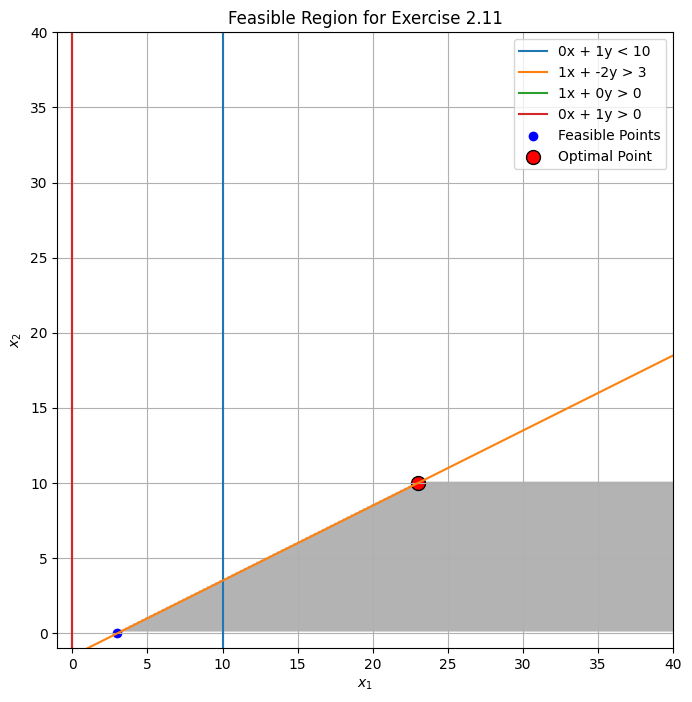


Extreme Points and Objective Function Values:
Point (23.00, 10.00) → z = 155.00
Point (3.00, 0.00) → z = 15.00


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def find_intersection(line1, line2):
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])
    b = np.array([line1[2], line2[2]])
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)

def is_feasible(point, constraints):
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):
            return False
        if sign == '>' and not (a * x + b * y >= c):
            return False
    return True

def find_feasible_points(constraints):
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):
        intersection = find_intersection(line1, line2)
        if intersection is not None and is_feasible(intersection, constraints):
            feasible_points.append(intersection)
    return np.array(feasible_points)

def plot_feasible_region(constraints, x_range, y_range):
    x, y = np.meshgrid(x_range, y_range)
    feasible_region = np.ones_like(x, dtype=bool)

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible_region &= (a * x + b * y <= c)
        elif sign == '>':
            feasible_region &= (a * x + b * y >= c)

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()),
               origin="lower", cmap="Greys", alpha=0.3)

def plot_constraints(constraints, x_range):
    for a, b, c, sign in constraints:
        y_vals = np.linspace(-5, 40, 200)
        if a != 0:
            x_vals = (c - b * y_vals) / a
        else:
            x_vals = np.full_like(y_vals, c / b)
        plt.plot(x_vals, y_vals, label=f'{a}x + {b}y {sign} {c}')

def solve_and_plot():
    constraints = [
        (0, 1, 10, '<'),   # x2 ≤ 10
        (1, -2, 3, '>'),   # x1 - 2x2 ≥ 3
        (1, 0, 0, '>'),    # x1 ≥ 0
        (0, 1, 0, '>')     # x2 ≥ 0
    ]

    obj_func = lambda x1, x2: 5*x1 + 4*x2  # z = 5x1 + 4x2

    x_range = np.linspace(-1, 40, 300)
    y_range = np.linspace(-1, 40, 300)
    plt.figure(figsize=(8, 8))

    plot_feasible_region(constraints, x_range, y_range)
    plot_constraints(constraints, x_range)

    feasible_points = find_feasible_points(constraints)

    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')

        # Compute objective function values at extreme points
        obj_values = [obj_func(x1, x2) for x1, x2 in feasible_points]

        # Display best extreme point
        best_idx = np.argmax(obj_values)
        optimal_point = feasible_points[best_idx]
        plt.scatter(*optimal_point, color='red', s=100, label='Optimal Point', edgecolors='black')

    plt.xlim(-1, 40)
    plt.ylim(-1, 40)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper right')
    plt.title("Feasible Region for Exercise 2.11")
    plt.grid(True)
    plt.show()

    # Print extreme points and their objective values
    if feasible_points.size > 0:
        print("\nExtreme Points and Objective Function Values:")
        for point in feasible_points:
            z_value = obj_func(point[0], point[1])
            print(f"Point ({point[0]:.2f}, {point[1]:.2f}) → z = {z_value:.2f}")
    else:
        print("\nNo feasible solution exists.")

solve_and_plot()


**2.12**

<ul />

Place the following linear programming model in standard form:

$$
\begin{align*}
\text{maximize} \quad & z = 16x_1 + 2x_2 - 3x_3 \\
\text{subject to} \quad & x_1 - 6x_2 \geq 4 \\  
& 3x_2 + 7x_3 \leq -5 \\
& x_1 + x_2 + x_3 = 10 \\
&  x_1, x_2, x_3 \geq 0
\end{align*}
$$

</ul>

**Code Implementation**

In [12]:
import copy

def convert_to_standard_form(objective_type, objective_coeffs, constraints_input, num_original_vars):
    """
    Converts a linear programming problem to standard form.
    (Same as before, no changes in this function)
    """
    standard_objective_type = "maximize"
    standard_objective_coeffs = list(objective_coeffs)

    if objective_type.lower() == "minimize":
        standard_objective_coeffs = [-c for c in standard_objective_coeffs]

    original_var_names = [f"x{i+1}" for i in range(num_original_vars)]
    aux_var_names = []
    num_aux_vars = 0

    standard_constraint_matrix = []
    standard_rhs_vector = []

    constraints = copy.deepcopy(constraints_input)

    for constr in constraints:
        current_coeffs_orig_vars = list(constr["coeffs"])
        current_type = constr["type"]
        current_rhs = constr["rhs"]

        if len(current_coeffs_orig_vars) < num_original_vars:
            current_coeffs_orig_vars.extend([0] * (num_original_vars - len(current_coeffs_orig_vars)))

        if current_rhs < 0:
            current_rhs = -current_rhs
            current_coeffs_orig_vars = [-c for c in current_coeffs_orig_vars]
            if current_type == "<=":
                current_type = ">="
            elif current_type == ">=":
                current_type = "<="

        full_coeffs_for_this_constraint = list(current_coeffs_orig_vars)
        full_coeffs_for_this_constraint.extend([0] * num_aux_vars)

        if current_type == "<=":
            num_aux_vars += 1
            aux_var_names.append(f"s{num_aux_vars}")
            standard_objective_coeffs.append(0)
            for row in standard_constraint_matrix:
                row.append(0)
            full_coeffs_for_this_constraint.append(1)
            standard_constraint_matrix.append(full_coeffs_for_this_constraint)
            standard_rhs_vector.append(current_rhs)
        elif current_type == ">=":
            num_aux_vars += 1
            aux_var_names.append(f"s{num_aux_vars}")
            standard_objective_coeffs.append(0)
            for row in standard_constraint_matrix:
                row.append(0)
            full_coeffs_for_this_constraint.append(-1)
            standard_constraint_matrix.append(full_coeffs_for_this_constraint)
            standard_rhs_vector.append(current_rhs)
        elif current_type == "==":
            standard_constraint_matrix.append(full_coeffs_for_this_constraint)
            standard_rhs_vector.append(current_rhs)
        else:
            raise ValueError(f"Unknown constraint type: {current_type}")

    all_variable_names = original_var_names + aux_var_names
    total_vars = len(all_variable_names)

    for i, row in enumerate(standard_constraint_matrix):
        if len(row) < total_vars:
            row.extend([0] * (total_vars - len(row)))
        elif len(row) > total_vars:
             raise ValueError(f"Constraint {i+1} has too many coefficients during final padding.")
    
    if len(standard_objective_coeffs) < total_vars:
        standard_objective_coeffs.extend([0] * (total_vars - len(standard_objective_coeffs)))


    return {
        "objective_type": standard_objective_type,
        "objective_coeffs": standard_objective_coeffs,
        "constraint_matrix": standard_constraint_matrix,
        "rhs_vector": standard_rhs_vector,
        "variable_names": all_variable_names
    }

def print_standard_lp(standard_lp_output):
    """Prints the LP in standard form in a readable format. (Corrected)"""
    print(f"{standard_lp_output['objective_type'].capitalize()} z = ", end="")
    
    obj_str_terms = []
    for i, coeff in enumerate(standard_lp_output['objective_coeffs']):
        if coeff == 0:
            continue
        var_name = standard_lp_output['variable_names'][i]
        if coeff == 1:
            obj_str_terms.append(f"{var_name}")
        elif coeff == -1:
            obj_str_terms.append(f"-{var_name}")
        else:
            obj_str_terms.append(f"{coeff}{var_name}")
    
    if not obj_str_terms:
        print("0")
    else:
        final_obj_str = obj_str_terms[0]
        for term in obj_str_terms[1:]:
            if term.startswith('-'):
                final_obj_str += f" {term}"
            else:
                final_obj_str += f" + {term}"
        print(final_obj_str)

    print("\nSubject to:")
    for i, row_coeffs in enumerate(standard_lp_output['constraint_matrix']):
        lhs_final_str = ""
        first_term_in_lhs = True
        for j, coeff in enumerate(row_coeffs):
            if coeff == 0:
                continue
            
            var_name = standard_lp_output['variable_names'][j]
            term_str = ""
            
            if coeff == 1:
                term_str = f"{var_name}"
            elif coeff == -1:
                term_str = f"-{var_name}"
            else:
                term_str = f"{coeff}{var_name}"

            if first_term_in_lhs:
                lhs_final_str = term_str
                first_term_in_lhs = False
            else:
                if coeff < 0: 
                    lhs_final_str += f" {term_str}"
                else: 
                    lhs_final_str += f" + {term_str}"
        
        if first_term_in_lhs: 
            lhs_final_str = "0"
            
        print(f"  {lhs_final_str} = {standard_lp_output['rhs_vector'][i]}")

    print("\nWhere:")
    print(f"  {', '.join(standard_lp_output['variable_names'])} >= 0")


# --- Input from the image ---
objective_type = "maximize"
objective_coeffs = [16, 2, -3]
num_original_vars = 3

constraints = [
    {"coeffs": [1, -6, 0], "type": ">=", "rhs": 4},
    {"coeffs": [0, 3, 7], "type": "<=", "rhs": -5},
    {"coeffs": [1, 1, 1], "type": "==", "rhs": 10}
]

# Convert to standard form
standard_form_lp = convert_to_standard_form(objective_type, objective_coeffs, constraints, num_original_vars)

# Print the standard form LP
print_standard_lp(standard_form_lp)

Maximize z = 16x1 + 2x2 -3x3

Subject to:
  x1 -6x2 -s1 = 4
  -3x2 -7x3 -s2 = 5
  x1 + x2 + x3 = 10

Where:
  x1, x2, x3, s1, s2 >= 0


**2.13**

<ul />

Place the following linear programming model in standard form:

$$
\begin{align*}
\text{maximize} \quad & z = 5x_1 + 6x_2 + 3x_3 \\
\text{subject to} \quad & |x_1 - 3x_3| \leq 10 \\  
& 10x_1 + 7x_2 + 4x_3 \leq 50 \\
& 2x_1 - 11x_3 \geq 15 \\
& x_1, x_3 \geq 0 \\
& x_2 \text{ unrestricted in sign}
\end{align*}
$$

</ul>


**Code Implementation**

In [13]:
import copy

def convert_to_standard_form(objective_type, objective_coeffs, constraints_input, num_original_vars):
    """
    Converts a linear programming problem to standard form.

    Args:
        objective_type (str): "maximize" or "minimize".
        objective_coeffs (list): Coefficients of the objective function for original variables.
        constraints_input (list of dict): Each dict represents a constraint with keys:
            "coeffs" (list): Coefficients for original variables in the constraint.
            "type" (str): Inequality/equality type (e.g., "<=", ">=", "==").
            "rhs" (float): Right-hand side value of the constraint.
        num_original_vars (int): The number of original variables (e.g., x1, x2, x3).
                                 This should reflect the number of variables AFTER handling
                                 things like unrestricted variables (x_i = x_i' - x_i'').

    Returns:
        dict: A dictionary containing the LP in standard form:
            "objective_type" (str): Always "maximize".
            "objective_coeffs" (list): Coefficients for all variables (original + auxiliary).
            "constraint_matrix" (list of list): The A matrix in Ax=b.
            "rhs_vector" (list): The b vector in Ax=b.
            "variable_names" (list): Names of all variables (e.g. x1, x2 ... sn).
    """
    standard_objective_type = "maximize"
    # Work with copies to avoid modifying original inputs
    standard_objective_coeffs = list(objective_coeffs)
    constraints = copy.deepcopy(constraints_input)

    # If objective is minimize, convert to maximize: max (-z) = -c*x
    if objective_type.lower() == "minimize":
        standard_objective_coeffs = [-c for c in standard_objective_coeffs]

    original_var_names = [f"x{i+1}" for i in range(num_original_vars)]
    aux_var_names = []
    num_aux_vars = 0

    standard_constraint_matrix = []
    standard_rhs_vector = []

    for constr in constraints:
        current_coeffs_orig_vars = list(constr["coeffs"])
        current_type = constr["type"]
        current_rhs = constr["rhs"]

        # Ensure current_coeffs_orig_vars matches num_original_vars, padding if necessary.
        if len(current_coeffs_orig_vars) < num_original_vars:
            current_coeffs_orig_vars.extend([0] * (num_original_vars - len(current_coeffs_orig_vars)))
        elif len(current_coeffs_orig_vars) > num_original_vars:
            raise ValueError(
                f"Constraint has {len(current_coeffs_orig_vars)} coefficients, "
                f"but num_original_vars is {num_original_vars}."
            )

        # Step 1: Ensure RHS is non-negative
        if current_rhs < 0:
            current_rhs = -current_rhs
            current_coeffs_orig_vars = [-c for c in current_coeffs_orig_vars]
            if current_type == "<=":
                current_type = ">="
            elif current_type == ">=":
                current_type = "<="
            # "==" remains "=="

        # Step 2: Prepare full coefficient list for current state of aux vars
        # It includes original variables' coefficients and zeros for existing auxiliary variables
        full_coeffs_for_this_constraint = list(current_coeffs_orig_vars)
        full_coeffs_for_this_constraint.extend([0] * num_aux_vars)

        # Step 3: Convert to equality and add new auxiliary variable if needed
        if current_type == "<=":
            # Add slack variable s_k >= 0:  ... + s_k = RHS
            num_aux_vars += 1
            aux_var_names.append(f"s{num_aux_vars}")
            standard_objective_coeffs.append(0) # Slack/surplus vars have 0 coeff in objective

            # Pad all previously added standard constraints with a 0 for this new aux variable
            for row in standard_constraint_matrix:
                row.append(0)
            
            full_coeffs_for_this_constraint.append(1) # Coefficient for the new slack variable
            standard_constraint_matrix.append(full_coeffs_for_this_constraint)
            standard_rhs_vector.append(current_rhs)

        elif current_type == ">=":
            # Subtract surplus variable s_k >= 0: ... - s_k = RHS
            num_aux_vars += 1
            aux_var_names.append(f"s{num_aux_vars}") # Naming all auxiliary vars s_i
            standard_objective_coeffs.append(0)

            for row in standard_constraint_matrix:
                row.append(0)
            
            full_coeffs_for_this_constraint.append(-1) # Coefficient for the new surplus variable
            standard_constraint_matrix.append(full_coeffs_for_this_constraint)
            standard_rhs_vector.append(current_rhs)

        elif current_type == "==":
            # Constraint is already an equality (RHS non-negativity handled)
            standard_constraint_matrix.append(full_coeffs_for_this_constraint)
            standard_rhs_vector.append(current_rhs)
        
        else:
            raise ValueError(f"Unknown constraint type: {current_type}")

    all_variable_names = original_var_names + aux_var_names
    
    # Final check & padding: ensure all constraint rows and objective coeffs
    total_vars = len(all_variable_names)

    for i, row in enumerate(standard_constraint_matrix):
        if len(row) < total_vars:
            row.extend([0] * (total_vars - len(row)))
        elif len(row) > total_vars: # Should not happen with current logic
             raise ValueError(f"Constraint {i+1} has too many coefficients during final padding.")
    
    if len(standard_objective_coeffs) < total_vars:
        standard_objective_coeffs.extend([0] * (total_vars - len(standard_objective_coeffs)))
    elif len(standard_objective_coeffs) > total_vars:
        raise ValueError("Objective function has too many coefficients during final padding.")


    return {
        "objective_type": standard_objective_type,
        "objective_coeffs": standard_objective_coeffs,
        "constraint_matrix": standard_constraint_matrix,
        "rhs_vector": standard_rhs_vector,
        "variable_names": all_variable_names # These are generic x1..xn, s1..sm
    }

def print_standard_lp(standard_lp_output, custom_var_names=None):
    """
    Prints the LP in standard form in a readable format. (Corrected)

    Args:
        standard_lp_output (dict): The output from convert_to_standard_form.
        custom_var_names (list, optional): A list of custom variable names that should
                                           match the order and count in
                                           standard_lp_output["variable_names"].
    """
    var_names_to_print = custom_var_names if custom_var_names else standard_lp_output['variable_names']
    
    if custom_var_names and len(custom_var_names) != len(standard_lp_output['variable_names']):
        raise ValueError("Length of custom_var_names must match the number of variables in standard_lp_output.")

    print(f"{standard_lp_output['objective_type'].capitalize()} z = ", end="")
    
    obj_str_terms = []
    first_obj_term = True
    for i, coeff in enumerate(standard_lp_output['objective_coeffs']):
        if coeff == 0:
            continue
        var_name = var_names_to_print[i]
        term_str = ""
        
        abs_coeff = abs(coeff)
        sign = "+" if coeff > 0 else "-"
        
        if abs_coeff == 1:
            term_str = f"{var_name}"
        else:
            term_str = f"{abs_coeff}{var_name}"

        if first_obj_term:
            final_term_str = f"{sign} {term_str}" if sign == "-" else term_str
            obj_str_terms.append(final_term_str)
            first_obj_term = False
        else:
            obj_str_terms.append(f" {sign} {term_str}")
            
    if not obj_str_terms:
        print("0")
    else:
        # Join terms ensuring the first term doesn't have a leading ' + ' if positive
        full_obj_str = "".join(obj_str_terms)
        if full_obj_str.startswith(" + "):
            full_obj_str = full_obj_str[3:]
        print(full_obj_str)


    print("\nSubject to:")
    for i, row_coeffs in enumerate(standard_lp_output['constraint_matrix']):
        lhs_final_str = ""
        first_term_in_lhs = True
        for j, coeff in enumerate(row_coeffs):
            if coeff == 0:
                continue # Skip terms with zero coefficient
            
            var_name = var_names_to_print[j]
            term_str = ""
            
            abs_coeff = abs(coeff)
            sign = "+" if coeff > 0 else "-"

            if abs_coeff == 1:
                term_str = f"{var_name}"
            else:
                term_str = f"{abs_coeff}{var_name}"

            if first_term_in_lhs:
                lhs_final_str = f"{sign} {term_str}" if sign == "-" else term_str
                first_term_in_lhs = False
            else:
                lhs_final_str += f" {sign} {term_str}"
        
        if first_term_in_lhs: # Means all coeffs were 0 for this constraint's LHS
            lhs_final_str = "0"
        
        # Clean up potential leading " + " from lhs_final_str if it starts positive
        if lhs_final_str.startswith(" + "):
            lhs_final_str = lhs_final_str[3:]
            
        print(f"  {lhs_final_str} = {standard_lp_output['rhs_vector'][i]}")

    print("\nWhere:")
    print(f"  {', '.join(var_names_to_print)} >= 0")



# Variables for the converter: x1, x2_p, x2_n, x3 (4 variables)
print("--- Example 2 ---")
objective_type_ex2 = "maximize"
# Coefficients for x1, x2_p, x2_n, x3
objective_coeffs_ex2 = [5, 6, -6, 3] 
num_original_vars_ex2 = 4 # x1, x2_p, x2_n, x3

constraints_ex2 = [
    {"coeffs": [1, 0, 0, -1], "type": "<=", "rhs": 10},   # x1 - x3 <= 10
    {"coeffs": [-1, 0, 0, 1], "type": "<=", "rhs": 10},  # -x1 + x3 <= 10
    {"coeffs": [10, 7, -7, 4], "type": "<=", "rhs": 50}, # 10x1 + 7x2_p - 7x2_n + 4x3 <= 50
    {"coeffs": [2, 0, 0, -11], "type": ">=", "rhs": 15}  # 2x1 - 11x3 >= 15
]

standard_form_lp_ex2 = convert_to_standard_form(
    objective_type_ex2,
    objective_coeffs_ex2,
    constraints_ex2,
    num_original_vars_ex2
)

# To print with names x1, x2p, x2n, x3, s1, s2, s3, s4:
# First, get the generic names from the output to know how many slack/surplus vars were added
generic_names_ex2 = standard_form_lp_ex2['variable_names']
num_slack_surplus_ex2 = len(generic_names_ex2) - num_original_vars_ex2

custom_names_for_ex2 = ["x1", "x2p", "x2n", "x3"] + [f"s{i+1}" for i in range(num_slack_surplus_ex2)]

print_standard_lp(standard_form_lp_ex2, custom_var_names=custom_names_for_ex2)

--- Example 2 ---
Maximize z = 5x1 + 6x2p - 6x2n + 3x3

Subject to:
  x1 - x3 + s1 = 10
  - x1 + x3 + s2 = 10
  10x1 + 7x2p - 7x2n + 4x3 + s3 = 50
  2x1 - 11x3 - s4 = 15

Where:
  x1, x2p, x2n, x3, s1, s2, s3, s4 >= 0


**2.14**

<ul />

Give all of the basic solutions and basic feasible solutions of the problem in Exercise 2.9.

</ul>

**Code Implementation**

In [14]:
import numpy as np
from itertools import combinations

def find_basic_solutions(A_eq, b_eq, var_names):
    """
    Finds all basic solutions and basic feasible solutions for an LP in standard form Ax=b.

    Args:
        A_eq (np.ndarray): Coefficient matrix A.
        b_eq (np.ndarray): Right-hand side vector b.
        var_names (list of str): Names of all variables (original + slack/surplus).

    Returns:
        tuple: (all_basic_solutions, basic_feasible_solutions)
               Each is a list of dictionaries, where each dictionary represents a solution
               with standard Python float values.
    """
    num_vars = A_eq.shape[1]  # n
    num_constraints = A_eq.shape[0] # m

    if num_vars < num_constraints:
        print("Number of variables is less than number of constraints. Cannot find basic solutions.")
        return [], []

    all_basic_solutions = []
    basic_feasible_solutions = []
    
    epsilon = 1e-9 # Epsilon for floating point comparisons

    var_indices = list(range(num_vars))
    for basic_indices_tuple in combinations(var_indices, num_constraints):
        basic_indices = list(basic_indices_tuple)
        
        B = A_eq[:, basic_indices]

        if B.shape[0] != B.shape[1] or abs(np.linalg.det(B)) < epsilon: # Check determinant against epsilon
            continue

        try:
            x_B = np.linalg.solve(B, b_eq)
        except np.linalg.LinAlgError:
            continue

        current_solution_values = np.zeros(num_vars)
        for i, बेसिक_idx in enumerate(basic_indices):
            current_solution_values[बेसिक_idx] = x_B[i]
        
        # MODIFICATION: Cast to float after rounding
        solution_dict = {
            var_names[i]: float(round(current_solution_values[i], 5)) 
            for i in range(num_vars)
        }
        all_basic_solutions.append(solution_dict)

        is_feasible = True
        for val_idx, val_basic in enumerate(x_B): # Iterate through x_B components for feasibility
            if val_basic < -epsilon:
                is_feasible = False
                break
        
        if is_feasible:
            feasible_solution_dict = {}
            for i in range(num_vars):
                val = current_solution_values[i]
                # Snap small negatives (within epsilon) to 0 for BFS display
                if -epsilon <= val < 0: 
                    val = 0.0
                # MODIFICATION: Cast to float after rounding
                feasible_solution_dict[var_names[i]] = float(round(val, 5))
            basic_feasible_solutions.append(feasible_solution_dict)
            
    return all_basic_solutions, basic_feasible_solutions

# --- Problem Definition ---
A_eq = np.array([
    [1,  0,  1,  0,  0],
    [0,  1,  0,  1,  0],
    [3, -2,  0,  0, -1]
])
b_eq = np.array([2, 3, 8])
variable_names = ['x1', 'x2', 's1', 's2', 's3']

# --- Find and Print Solutions ---
basic_sols, bfs_sols = find_basic_solutions(A_eq, b_eq, variable_names)

print("All Basic Solutions:")
if not basic_sols:
    print("No basic solutions found.")
else:
    for i, sol in enumerate(basic_sols):
        print(f"Solution {i+1}: {sol}")

print("\n" + "="*30 + "\n")

print("Basic Feasible Solutions (BFS):")
if not bfs_sols:
    print("No basic feasible solutions found.")
else:
    for i, sol in enumerate(bfs_sols):
        print(f"BFS {i+1}: {sol}")

All Basic Solutions:
Solution 1: {'x1': 4.66667, 'x2': 3.0, 's1': -2.66667, 's2': 0.0, 's3': 0.0}
Solution 2: {'x1': 2.0, 'x2': -1.0, 's1': 0.0, 's2': 4.0, 's3': 0.0}
Solution 3: {'x1': 2.0, 'x2': 3.0, 's1': 0.0, 's2': 0.0, 's3': -8.0}
Solution 4: {'x1': 2.66667, 'x2': 0.0, 's1': -0.66667, 's2': 3.0, 's3': 0.0}
Solution 5: {'x1': 2.0, 'x2': 0.0, 's1': 0.0, 's2': 3.0, 's3': -2.0}
Solution 6: {'x1': 0.0, 'x2': -4.0, 's1': 2.0, 's2': 7.0, 's3': 0.0}
Solution 7: {'x1': 0.0, 'x2': 3.0, 's1': 2.0, 's2': 0.0, 's3': -14.0}
Solution 8: {'x1': 0.0, 'x2': 0.0, 's1': 2.0, 's2': 3.0, 's3': -8.0}


Basic Feasible Solutions (BFS):
No basic feasible solutions found.


**2.15**

<ul />

 Give the coordinates of all of the basic solutions and basic feasible solutions of the problem in Exercise 2.10.

</ul>

**Code Implementation**

In [15]:
import numpy as np
from itertools import combinations

def find_basic_solutions(A_eq, b_eq, var_names):
    """
    Finds all basic solutions and basic feasible solutions for an LP in standard form Ax=b.

    Args:
        A_eq (np.ndarray): Coefficient matrix A.
        b_eq (np.ndarray): Right-hand side vector b.
        var_names (list of str): Names of all variables (original + slack/surplus).

    Returns:
        tuple: (all_basic_solutions, basic_feasible_solutions)
               Each is a list of dictionaries, where each dictionary represents a solution
               with standard Python float values.
    """
    num_vars = A_eq.shape[1]  # n
    num_constraints = A_eq.shape[0] # m

    if num_vars < num_constraints:
        print("Number of variables is less than number of constraints. Cannot find basic solutions.")
        return [], []

    all_basic_solutions = []
    basic_feasible_solutions = []
    
    epsilon = 1e-9 # Epsilon for floating point comparisons

    var_indices = list(range(num_vars))
    for basic_indices_tuple in combinations(var_indices, num_constraints):
        basic_indices = list(basic_indices_tuple)
        
        B = A_eq[:, basic_indices]

        # Check if B is square and if its determinant is non-zero (within tolerance)
        if B.shape[0] != B.shape[1] or abs(np.linalg.det(B)) < epsilon:
            continue

        try:
            # Solve B * x_B = b_eq for basic variables x_B
            x_B = np.linalg.solve(B, b_eq)
        except np.linalg.LinAlgError:
            # This might happen if matrix is singular despite det check due to precision
            continue

        # Construct the full solution vector
        current_solution_values = np.zeros(num_vars)
        for i, idx_basic_var in enumerate(basic_indices): # Renamed basic_idx to idx_basic_var
            current_solution_values[idx_basic_var] = x_B[i]
        
        # Store basic solution with Python floats
        solution_dict = {
            var_names[i]: float(round(current_solution_values[i], 5)) 
            for i in range(num_vars)
        }
        all_basic_solutions.append(solution_dict)

        # Check for feasibility
        is_feasible = True
        # Check only the values of basic variables for feasibility, non-basic are 0.
        for val_basic in x_B: 
            if val_basic < -epsilon: # Allow for small negative due to precision
                is_feasible = False
                break
        
        if is_feasible:
            feasible_solution_dict = {}
            for i in range(num_vars):
                val = current_solution_values[i]
                # Snap small negatives (within epsilon) to 0 for BFS display
                if -epsilon <= val < 0: 
                    val = 0.0
                # Store feasible solution with Python floats
                feasible_solution_dict[var_names[i]] = float(round(val, 5))
            basic_feasible_solutions.append(feasible_solution_dict)
            
    return all_basic_solutions, basic_feasible_solutions

# --- Example for Exercise 2.10 ---
# Maximize z = 3x1 + 4x2
# Subject to:
# 6x1 + 8x2 <= 10  =>  6x1 + 8x2 + s1 = 10
# x1 + x2 >= 1     =>  x1 + x2 - s2 = 1
# x1, x2 >= 0

print("--- Solutions for Exercise 2.10 ---")
A_eq_ex210 = np.array([
    [6,  8,  1,  0],  # Coefficients for x1, x2, s1, s2
    [1,  1,  0, -1]
])

b_eq_ex210 = np.array([10, 1])

variable_names_ex210 = ['x1', 'x2', 's1', 's2']

# --- Find and Print Solutions ---
basic_sols_ex210, bfs_sols_ex210 = find_basic_solutions(A_eq_ex210, b_eq_ex210, variable_names_ex210)

print("All Basic Solutions:")
if not basic_sols_ex210:
    print("No basic solutions found.")
else:
    for i, sol in enumerate(basic_sols_ex210):
        print(f"Solution {i+1}: {sol}")

print("\n" + "="*30 + "\n")

print("Basic Feasible Solutions (BFS):")
if not bfs_sols_ex210:
    print("No basic feasible solutions found.")
else:
    for i, sol in enumerate(bfs_sols_ex210):
        print(f"BFS {i+1}: {sol}")

--- Solutions for Exercise 2.10 ---
All Basic Solutions:
Solution 1: {'x1': -1.0, 'x2': 2.0, 's1': 0.0, 's2': 0.0}
Solution 2: {'x1': 1.0, 'x2': 0.0, 's1': 4.0, 's2': 0.0}
Solution 3: {'x1': 1.66667, 'x2': 0.0, 's1': 0.0, 's2': 0.66667}
Solution 4: {'x1': 0.0, 'x2': 1.0, 's1': 2.0, 's2': 0.0}
Solution 5: {'x1': 0.0, 'x2': 1.25, 's1': 0.0, 's2': 0.25}
Solution 6: {'x1': 0.0, 'x2': 0.0, 's1': 10.0, 's2': -1.0}


Basic Feasible Solutions (BFS):
BFS 1: {'x1': 1.0, 'x2': 0.0, 's1': 4.0, 's2': 0.0}
BFS 2: {'x1': 1.66667, 'x2': 0.0, 's1': 0.0, 's2': 0.66667}
BFS 3: {'x1': 0.0, 'x2': 1.0, 's1': 2.0, 's2': 0.0}
BFS 4: {'x1': 0.0, 'x2': 1.25, 's1': 0.0, 's2': 0.25}
